In [2]:
%pip install pandas
%pip install numpy
%pip install matplotlib
%pip install seaborn
%pip install statsmodels

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.0
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.0
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.0
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.0
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt
import py_funcs as pf
import statsmodels

sn.set_theme(style='darkgrid')

In [57]:
#Read the data
dfht = pd.read_csv('./data/herb_transplants_raw.csv')
dfht.columns = ['pot','species','co2_lvl','water_lvl','ag_biomass','bg_biomass','rep_biomass','flowers_num',
                'fruit_num','transplanted_w_leaf','transplanted_w_radicle','comment']

In [58]:
dfht.head()

,pot,species,co2_lvl,water_lvl,ag_biomass,bg_biomass,rep_biomass,flowers_num,fruit_num,transplanted_w_leaf,transplanted_w_radicle,comment
0,19,MIGU,Ambient,Fluct,0.1255,0.0683,0.0789,10.0,NaN,8,0,NaN
1,42,MIGU,Ambient,Fluct,0.0349,0.0177,0.0568,3.0,6.0,10,0,NaN
2,53,MIGU,Ambient,Fluct,0.0556,0.0432,0.0312,7.0,NaN,1,0,NaN
3,105,MIGU,Ambient,Fluct,0.1489,0.1361,0.0970,12.0,NaN,10,0,NaN
4,140,MIGU,Ambient,Fluct,0.1629,0.1291,0.1041,2.0,12.0,8,0,NaN


In [59]:
# dfht.describe()

In [60]:
#Check data completeness
print(dfht.isna().sum(), '\n-----------\n')

#By species
spec = dfht.species.unique()
print('SPECIES:', spec, '\n----------\n')

for sp in spec:
    print('Species:', sp)
    print(dfht[dfht.species == sp].isna().sum())
    print('----------')

pot                         0
species                     0
co2_lvl                     0
water_lvl                   0
ag_biomass                 47
bg_biomass                 47
rep_biomass               121
flowers_num               122
fruit_num                 143
transplanted_w_leaf         0
transplanted_w_radicle      0
comment                   126
dtype: int64 
-----------

SPECIES: ['MIGU' 'NAOF' 'POMO' 'SIIR' 'VEAN'] 
----------

Species: MIGU
pot                        0
species                    0
co2_lvl                    0
water_lvl                  0
ag_biomass                 9
bg_biomass                 9
rep_biomass               14
flowers_num               16
fruit_num                 31
transplanted_w_leaf        0
transplanted_w_radicle     0
comment                   26
dtype: int64
----------
Species: NAOF
pot                        0
species                    0
co2_lvl                    0
water_lvl                  0
ag_biomass                 2
bg_biomas

In [61]:
#Drop Sisymbrium irio
dfht = dfht[dfht.species != 'SIIR']
species_nm = dfht.species.unique()
print(species_nm)

['MIGU' 'NAOF' 'POMO' 'VEAN']


In [62]:
#Look at the data types
dfht.dtypes

pot                         int64
species                    object
co2_lvl                    object
water_lvl                  object
ag_biomass                float64
bg_biomass                float64
rep_biomass               float64
flowers_num               float64
fruit_num                 float64
transplanted_w_leaf         int64
transplanted_w_radicle      int64
comment                    object
dtype: object

In [63]:
#Feature Engineering
dfht['total_cnt'] = dfht.transplanted_w_leaf + dfht.transplanted_w_radicle
dfht['ag_biomass_m'] = dfht.ag_biomass/dfht.total_cnt
dfht['total_biomass'] = dfht.ag_biomass + dfht.bg_biomass
# dfht['log_tbiomass'] = np.log(dfht.total_biomass)

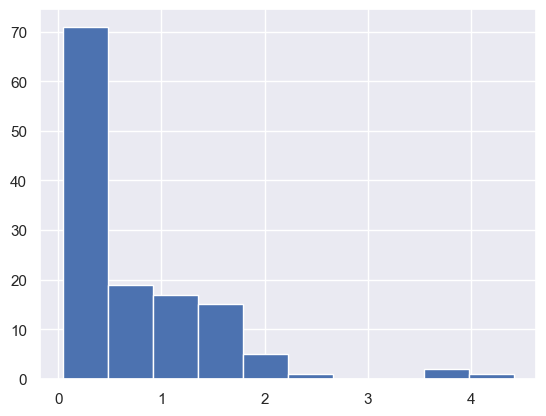

In [64]:
#Distribution of total biomass
dfht.total_biomass.hist(bins=10)
plt.show()

<Axes: xlabel='species', ylabel='total_biomass'>

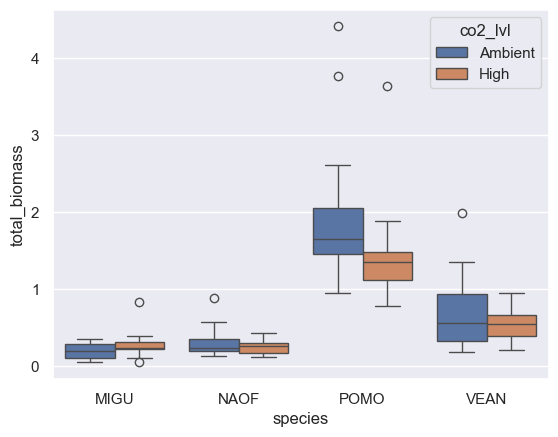

In [65]:
#Total biomass by species and CO2 level
sn.boxplot(data=dfht, x='species', y='total_biomass', hue='co2_lvl')

<Axes: xlabel='water_lvl', ylabel='total_biomass'>

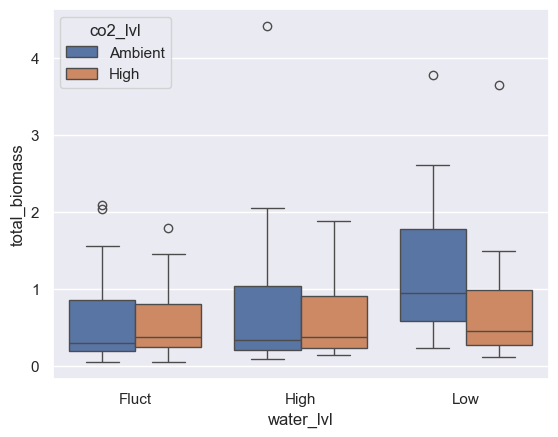

In [66]:
#Total biomass by water and CO2 level
sn.boxplot(data=dfht, x='water_lvl', y='total_biomass', hue='co2_lvl')

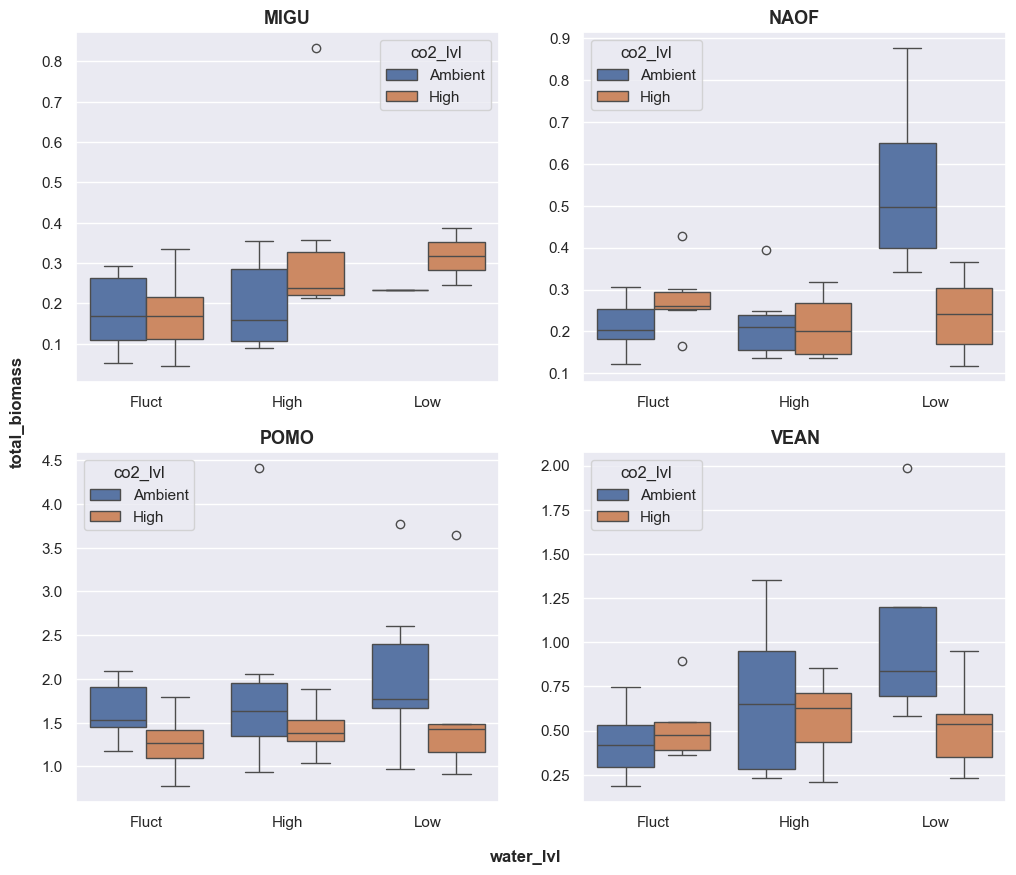

In [67]:
#Look at biomass broken out by species
pf.plot_multiple_boxplots(dfht, by = 'species', x = 'water_lvl', y = 'total_biomass', 
                           hue = 'co2_lvl', subplots = {'nrows':2, 'ncols':2, 'figsize':(12,10)})

In [68]:
#Create one-hot encoded versions of the treatments
df = dfht.copy()
df = df[df.co2_lvl.isna()==False]
df = df[df.total_biomass.isna()==False]

df = df.drop(columns=['comment'])
df['co2_lvl'] = np.where(df['co2_lvl'] == 'High', 1, 0)
df['water_low'] = np.where(df['water_lvl'] == 'Low', 1, 0)
df['water_fluct'] = np.where(df['water_lvl'] == 'Fluct', 1, 0)
df['water_high'] = np.where(df['water_lvl'] == 'High', 1, 0)

df.loc[(df['co2_lvl']==0) & (df['water_fluct']==1), 'treatment'] = 'CO2Amb_WA'
df.loc[(df['co2_lvl']==0) & (df['water_low']==1), 'treatment'] = 'CO2Amb_WL'
df.loc[(df['co2_lvl']==0) & (df['water_high']==1), 'treatment'] = 'CO2Amb_WH'
df.loc[(df['co2_lvl']==1) & (df['water_fluct']==1), 'treatment'] = 'CO2High_WA'
df.loc[(df['co2_lvl']==1) & (df['water_low']==1), 'treatment'] = 'CO2High_WL'
df.loc[(df['co2_lvl']==1) & (df['water_high']==1), 'treatment'] = 'CO2High_WH'

In [69]:
#Drop the MIGU, low water, ambient CO2 treatment due to low sample size (2)
dfht = dfht[(dfht['species'] != 'MIGU') & (dfht['co2_lvl'] != 'Ambient') & (dfht['water_lvl'] != 'Low')]

In [70]:
df.treatment.value_counts()

treatment
CO2Amb_WA     24
CO2Amb_WH     24
CO2High_WA    24
CO2High_WH    24
CO2High_WL    20
CO2Amb_WL     15
Name: count, dtype: int64

In [71]:
df.to_csv('herb_transplabnts_model_rdy.csv')